In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### Simulation

How likely is it that you roll doubles when rolling two dice?



In [4]:
n_trials = nrows = 10_000
n_dice = ncols = 2

rolls = np.random.choice([1,2,3,4,5,6], n_trials * n_dice).reshape(nrows,ncols)
rolls

array([[5, 3],
       [6, 6],
       [6, 2],
       ...,
       [4, 1],
       [3, 3],
       [6, 4]])

In [5]:
rolls = pd.DataFrame(rolls)
print(f'{(rolls[0] == rolls[1]).mean()}% chance to roll doubles')

0.1702% chance to roll doubles


If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?



In [6]:
# making life easier(?) heads = 1, tails = 0
c_trials = crows = 10_000
c_dice = ccols = 8

coins = np.random.choice([1,0], c_trials * c_dice).reshape(crows,ccols)
coins

array([[1, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 0]])

In [7]:
coins = pd.DataFrame(coins)
sum_of_flips = coins.sum(axis=1)
exactly_three_heads = sum_of_flips == 3
more_than_three_heads = sum_of_flips > 3
all_heads = sum_of_flips == 8
all_tails = sum_of_flips == 0
rate_of_3_heads = exactly_three_heads.astype(int).mean()
rate_of_more_than_3 = more_than_three_heads.astype(int).mean()
rate_all_heads = all_heads.astype(int).mean()
rate_all_tails = all_tails.astype(int).mean()
print(f'{rate_of_3_heads} chance of exactly 3 heads, {rate_of_more_than_3} chance of more than 3 heads.')
print(f"There's also a {rate_all_heads} chance of all heads, and {rate_all_tails} chance of all tails.")

0.223 chance of exactly 3 heads, 0.6334 chance of more than 3 heads.
There's also a 0.0035 chance of all heads, and 0.0035 chance of all tails.


There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?



In [8]:
outcomes = ['web', 'web', 'web', 'ds']
billboards_tot = 2
billboards = np.random.choice(outcomes, size = (n_trials, billboards_tot))
billboards

array([['ds', 'web'],
       ['ds', 'web'],
       ['web', 'ds'],
       ...,
       ['web', 'web'],
       ['ds', 'web'],
       ['web', 'ds']], dtype='<U3')

In [9]:
((billboards == 'ds').sum(axis=1) == 2).mean()

0.0647

Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal) You'll need to make a judgement call on how to handle some of your values



In [10]:
mean = 3
sd = 1.5
days = 5

poptarts_a_day = np.random.normal(mean, sd, size=(n_trials, days))
poptarts_a_day

array([[4.19984399, 4.2715775 , 2.44752785, 3.48967213, 4.3837154 ],
       [3.68420605, 1.21170377, 4.29933524, 3.19285076, 2.22900608],
       [4.71091031, 3.39680001, 2.28892013, 3.72703181, 1.26505147],
       ...,
       [1.55409865, 1.14220643, 4.25983808, 3.38973095, 1.63244174],
       [2.28851859, 2.2452114 , 2.15342407, 3.10794588, 4.66055244],
       [4.27538885, 5.54717845, 1.77975681, 4.63756248, 3.58291998]])

In [11]:
poptarts_a_week = poptarts_a_day.sum(axis=1)

In [12]:
print(f"{(poptarts_a_week < 17).mean()} chance to be able to purchase a poptart on Friday afternoon.")

0.7204 chance to be able to purchase a poptart on Friday afternoon.


Compare Heights

Men have an average height of 178 cm and standard deviation of 8cm.
Women have a mean of 170, sd = 6cm.
Since you have means and standard deviations, you can use np.random.normal to generate observations.
If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?


In [13]:
male_mean = 178
male_sd = 8
female_mean = 170
female_sd = 6

In [14]:
male_height = np.random.normal(male_mean, male_sd, n_trials)
male_height

array([177.64815199, 182.28271685, 188.15461301, ..., 189.13773716,
       170.63166172, 183.95377177])

In [15]:
female_height = np.random.normal(female_mean, female_sd,n_trials)
female_height

array([169.698601  , 171.66999062, 177.07419803, ..., 164.61619395,
       168.00330143, 166.1861805 ])

In [16]:
(female_height > male_height).mean()

0.2126

When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

What is the probability that we observe an installation issue within the first 150 students that download anaconda?

How likely is it that 450 students all download anaconda without an issue?



In [17]:
install_outcomes = ['S', 'F']
students = 50
downloads = np.random.choice(install_outcomes, size=(n_trials, students), p = [249/250, 1/250])
downloads

array([['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ...,
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S']], dtype='<U1')

In [18]:
((downloads == 'S').sum(axis=1) == 50).mean()

0.8189

In [19]:
students2 = 100
downloads = np.random.choice(install_outcomes, size=(n_trials, students2), p = [249/250, 1/250])
downloads

array([['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ...,
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S']], dtype='<U1')

In [20]:
((downloads == 'S').sum(axis=1) == 100).mean()

0.671

In [21]:
students3 = 150
downloads = np.random.choice(install_outcomes, size=(n_trials, students3), p = [249/250, 1/250])
downloads

array([['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ...,
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S']], dtype='<U1')

In [22]:
((downloads == 'S').sum(axis=1) < students3).mean()

0.4434

In [23]:
students4 = 450
downloads = np.random.choice(install_outcomes, size=(n_trials, students4), p = [249/250, 1/250])
downloads

array([['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ...,
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S'],
       ['S', 'S', 'S', ..., 'S', 'S', 'S']], dtype='<U1')

In [24]:
((downloads == 'S').sum(axis=1) == students4).mean()

0.1628

There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

How likely is it that a food truck will show up sometime this week?



In [25]:
food_truck_prob = 0.70
days = 3
is_truck_here = np.random.random((n_trials, days))
is_truck_here

array([[0.52846826, 0.60829083, 0.91167616],
       [0.80971742, 0.10125827, 0.74998636],
       [0.40530542, 0.20838484, 0.98643838],
       ...,
       [0.8436847 , 0.44301454, 0.31069441],
       [0.50104922, 0.73142724, 0.53946866],
       [0.92887237, 0.72022653, 0.51419612]])

In [26]:
food_is_here = (is_truck_here < food_truck_prob)
food_is_here

array([[ True,  True, False],
       [False,  True, False],
       [ True,  True, False],
       ...,
       [False,  True,  True],
       [ True, False,  True],
       [False, False,  True]])

In [27]:
(food_is_here.sum(axis=1) == 0).mean()

0.0274

In [28]:
days = 7
is_truck_here = np.random.random((n_trials, days))
food_is_here = (is_truck_here < food_truck_prob)
(food_is_here.sum(axis=1) > 0).mean()

0.9997

If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?



In [29]:
outcome = range(366)
people = 23

birthdays = np.random.choice(outcome, size=(n_trials,people))
birthdays

array([[177, 334,  19, ..., 127,  73,  86],
       [228,  40, 359, ..., 265,  63,  85],
       [169, 334, 323, ...,  35, 226, 291],
       ...,
       [ 75, 296, 233, ..., 165, 117, 192],
       [246, 240, 223, ..., 230, 272, 106],
       [ 46, 309, 145, ..., 336, 193, 272]])

In [30]:
birthdays = pd.DataFrame(birthdays)
birthdays

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,177,334,19,126,177,287,271,232,200,189,...,154,115,121,27,229,27,1,127,73,86
1,228,40,359,19,219,235,121,42,325,240,...,307,8,274,136,43,170,22,265,63,85
2,169,334,323,266,100,275,80,137,245,37,...,110,225,222,148,72,11,361,35,226,291
3,312,317,295,185,227,309,26,238,245,129,...,165,175,217,175,282,314,261,311,20,265
4,26,92,52,274,335,106,276,89,329,0,...,129,78,148,354,151,322,88,92,354,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,276,104,305,235,279,63,263,261,228,127,...,162,318,265,111,178,86,65,235,100,68
9996,134,216,363,46,268,40,297,123,133,266,...,272,57,97,220,184,17,74,318,128,296
9997,75,296,233,127,200,137,153,350,22,251,...,318,61,45,190,195,269,237,165,117,192
9998,246,240,223,326,23,164,28,43,171,203,...,292,172,114,108,278,196,217,230,272,106


In [31]:
# I love nunique, I'm curious what nlargest/nsmallest does in the wild.
(birthdays.nunique(axis=1) < people).mean()

0.5077

In [32]:
people2 = 20
birthdays = np.random.choice(outcome, size=(n_trials,people2))
birthdays = pd.DataFrame(birthdays)
(birthdays.nunique(axis=1) < people2).mean()

0.4079

In [33]:
people3 = 40
birthdays = np.random.choice(outcome, size=(n_trials,people3))
birthdays = pd.DataFrame(birthdays)
(birthdays.nunique(axis=1) < people3).mean()

0.8883

#### Bonus:

##### Mage Duel!

Let's use what we've learned to play a mage duel!

- Imagine your wizard has 6d4 health points and you have spells that do 6d4 damage.
- Your opposing mage has 4d6 health points and spells that do 4d6. "4d6" means 


In [43]:
d4 = [1,2,3,4]
d6 = [1,2,3,4,5,6]
my_dice = my_cols = 6
opp_dice = opp_cols = 4


##### Exercises
Simulate mage duels to answer who is the more powerful mage?


1. Before running simulations, do you have a hypothesis of which mage will win? Do you have a hunch? Write it down. This is your first exercise.


In [39]:
# Both mages should have an about equal chance of winning since the max possible 
# points for both are 24 HP and 24 damage.

2. Simulate 10 mage duels. Is there a clear winner? Run that 10 duel simulation again. Was the answer similar?


In [51]:
# Round 1:
duels = duel_rows = 10

In [52]:
my_hp = np.random.choice(d4, duels * my_dice).reshape(duel_rows,my_cols).sum(axis=1)
my_hp

array([18, 17, 14, 14, 16, 18, 16, 15, 18, 13])

In [53]:
opponent_hp = np.random.choice(d6, duels * opp_dice).reshape(duel_rows,opp_cols).sum(axis=1)
opponent_hp

array([13, 21, 14, 10, 12, 11, 13, 15, 19, 13])

In [54]:
my_attacks = np.random.choice(d4, duels * my_dice).reshape(duel_rows,my_cols).sum(axis=1)
opponent_attacks = np.random.choice(d6, duels * opp_dice).reshape(duel_rows, opp_cols).sum(axis=1)
my_attacks, opponent_attacks

(array([13, 19, 18, 14, 16, 13, 16, 12, 17, 11]),
 array([10, 15, 20, 12, 15, 23, 10, 17, 15, 17]))

In [57]:
(my_attacks > opponent_hp).mean(),(opponent_attacks > my_hp).mean()

(0.5, 0.4)

In [58]:
# Round 2:
opponent_hp = np.random.choice(d6, duels * opp_dice).reshape(duel_rows,opp_cols).sum(axis=1)
my_hp = np.random.choice(d4, duels * my_dice).reshape(duel_rows,my_cols).sum(axis=1)
my_hp, opponent_hp

(array([11, 16, 14, 21, 17, 18, 15, 14, 16, 14]),
 array([12, 17, 10, 13, 10, 15, 10, 13, 13, 11]))

In [59]:
my_attacks = np.random.choice(d4, duels * my_dice).reshape(duel_rows,my_cols).sum(axis=1)
opponent_attacks = np.random.choice(d6, duels * opp_dice).reshape(duel_rows, opp_cols).sum(axis=1)
my_attacks, opponent_attacks

(array([14, 13, 11, 11, 14, 14, 14, 17, 20, 19]),
 array([16, 13, 11,  9,  8, 13, 18, 15, 10, 14]))

In [60]:
(my_attacks > opponent_hp).mean(),(opponent_attacks > my_hp).mean()

(0.7, 0.3)

In [ ]:
# If each duel only has one round of attacks, it's almost exactly 50/50 odds, first 10 matches were 50% my favour, 40% my opponents, and 10% a draw. ((This isn't perfectly acurate, but I'm not sure how to judge things like, needing more than one attack, or both of us getting over the other's HP.))
# Round 2, the opponent mage had rolls like my friend Nori! So his chances of winning we're a lot less. So my mage showed 70% favour, and Nori's mage showed 30%

3. Do the results change much at 100 duels?


In [61]:
duels = duel_rows = 100

In [62]:
opponent_hp = np.random.choice(d6, duels * opp_dice).reshape(duel_rows,opp_cols).sum(axis=1)
my_hp = np.random.choice(d4, duels * my_dice).reshape(duel_rows,my_cols).sum(axis=1)
my_hp, opponent_hp

(array([17, 15, 18, 11, 17, 17, 15, 17, 13, 15, 18, 13, 14, 10, 12, 15, 18,
        15, 17, 18, 18, 18, 18, 18, 17, 16, 17, 16, 12, 15, 15, 11, 16, 17,
        14, 14, 14, 13, 13, 15, 16, 15, 17, 24, 17, 13, 19, 17, 15, 14, 13,
        10, 16, 18, 15, 13, 15, 16, 21, 11, 15, 12, 15, 15, 13, 17, 12, 13,
        15, 13, 15, 14,  8, 15, 16, 11, 15, 17, 15, 20, 11, 14, 17, 15, 19,
        18, 17, 10, 16, 21, 13, 14, 14, 17, 17, 13, 14, 13, 20, 14]),
 array([17,  9,  8, 14, 12, 14, 13, 15, 13, 19, 12, 18, 17, 12, 22, 15, 14,
        13, 15, 13, 11, 14, 17, 15, 13, 16, 11, 16, 14, 14, 11, 17, 14,  9,
        14, 12, 11, 16, 10, 15, 14, 10, 17, 15, 16, 16, 10, 11, 10, 13, 12,
        21, 10, 15, 11, 14, 16, 14,  9, 18, 13, 15,  9, 12, 18, 17, 12, 10,
        15, 15, 15, 13, 15, 15, 11, 16, 12, 15, 12,  9, 19, 14, 19, 13, 11,
         8, 12, 16, 11, 14, 12, 10, 14, 16, 13, 18, 15, 15,  9, 12]))

In [63]:
my_attacks = np.random.choice(d4, duels * my_dice).reshape(duel_rows,my_cols).sum(axis=1)
opponent_attacks = np.random.choice(d6, duels * opp_dice).reshape(duel_rows, opp_cols).sum(axis=1)
my_attacks, opponent_attacks

(array([17, 12, 12, 17, 12, 14, 13, 19, 19, 16, 16, 19, 15, 10, 13, 17, 19,
        15, 15, 13, 19, 14, 12, 20, 15, 13, 17, 15, 12, 15, 19, 17, 15, 12,
        18, 14,  8, 15, 13, 15, 12, 15, 17, 15, 18, 19, 17, 19, 19, 17, 16,
        17, 17, 21, 17, 16, 13, 10, 13, 14, 14, 11, 20, 16, 17, 13, 16, 15,
        14, 15, 18, 17, 14, 13, 16, 18, 16, 13, 15, 15, 16, 16, 14, 20, 16,
        18, 17, 12, 17, 16, 15, 13,  9, 18, 14, 17, 22, 10, 16, 13]),
 array([12, 12, 14,  9, 13, 11, 14, 19, 14, 15, 17, 13, 15, 12, 11, 13, 15,
        13,  9, 17, 12, 15, 15, 15, 12, 19, 14, 14, 13,  8, 20, 16, 16, 15,
         8,  8, 15, 14, 15, 13, 11, 13, 12, 13,  7,  8, 11, 10, 14,  9, 13,
        13, 13, 12, 14, 14, 15, 10, 11, 19, 14, 14, 16, 15, 13,  9, 13, 17,
        14, 16, 15, 14, 12,  8, 19, 11, 22, 17, 13, 16,  9, 11, 16,  5, 18,
        15,  9,  9, 16, 14, 12, 17, 12, 17, 14, 18, 12, 17,  9, 12]))

In [64]:
(my_attacks > opponent_hp).mean(),(opponent_attacks > my_hp).mean()

(0.6, 0.25)

In [65]:
# Nori's mage rolled very poorly again,
# but they're about on par with his last set of terrible rolls.

4. Now, simulate 10,000 mage duels. Is there a clear winner?

In [66]:
duels = duel_rows = 10000

In [67]:
opponent_hp = np.random.choice(d6, duels * opp_dice).reshape(duel_rows,opp_cols).sum(axis=1)
my_hp = np.random.choice(d4, duels * my_dice).reshape(duel_rows,my_cols).sum(axis=1)
my_hp, opponent_hp

(array([14, 12, 13, ..., 10, 16, 13]), array([ 5, 17, 18, ..., 19, 20, 22]))

In [68]:
my_attacks = np.random.choice(d4, duels * my_dice).reshape(duel_rows,my_cols).sum(axis=1)
opponent_attacks = np.random.choice(d6, duels * opp_dice).reshape(duel_rows, opp_cols).sum(axis=1)
my_attacks, opponent_attacks

(array([12, 18, 14, ..., 13, 16, 14]), array([16, 12,  9, ..., 10, 11, 14]))

In [69]:
(my_attacks > opponent_hp).mean(),(opponent_attacks > my_hp).mean()

(0.5489, 0.3619)

In [70]:
# This one matches more closely to the first round of 10 with a 55% vs. 36%

I'm curious if the fact that the lowest I can roll is 6, vs. their lowest of 4 might play a role in the slightly skewed results.

In [71]:
(my_hp >= 20).mean(), (my_attacks >= 20).mean(), (opponent_hp >= 20).mean(), (opponent_attacks >= 20).mean()

(0.0462, 0.0491, 0.0536, 0.0533)

The other mage actually seems to have a slightly better chance of getting 20 or higher for both their HP and Attack Damage, so perhaps it's just some very bad rolls.

Just under 5% chances for me and just over 5% chances for them.

In [72]:
(my_hp <= 10).mean(), (my_attacks <= 10).mean(), (opponent_hp <= 10).mean(), (opponent_attacks <= 10).mean()

(0.045, 0.0531, 0.161, 0.1651)

They have a higher chance of getting lower sums though due to only rolling 4 dice vs my 6.

4.5% and 5.3% vs. 16% and 16.5%

#### Bonus:


The player pays $1 to play and picks a number.


The House rolls 3 dice at once.


##### Payouts:

- $3 if all three dice match the chosen number
- $2 if exactly two dice match the chosen number
- $1 is exactly one of the dice matches the chosen number
- If none of the dice match the player's chosen number, then the House keeps the $1.

##### Exercises:

1. What are your chances of getting an outcome payout of $2? (where we earned $3 on the $1 ante)


In [76]:
games = g_rows = 1_000_000
dice = g_col = 3
number = 4
rolls = np.random.choice(d6, games * dice).reshape(g_rows, g_col)
rolls, number

(array([[5, 6, 1],
        [5, 6, 3],
        [5, 6, 5],
        ...,
        [1, 4, 6],
        [5, 5, 2],
        [5, 1, 5]]),
 4)

In [86]:
print(f"{round((((rolls == number).sum(axis=1) == 3).mean()) * 100, 2)}% chance of getting a 2$ payout (aka: winning 3$)")

0.46% chance of getting a 2$ payout (aka: winning 3$)


2. What are your chances of getting an payout of $1?

In [87]:
print(f"{round((((rolls == number).sum(axis=1) == 2).mean()) * 100, 2)}% chance of getting a 1$ payout (aka: winning 2$)")

6.95% chance of getting a 1$ payout (aka: winning 2$)



3. What are your chances of getting a payout of $0 where you ante $1 and win $1?


In [88]:
print(f"{round((((rolls == number).sum(axis=1) == 1).mean()) * 100, 2)}% chance of breaking even (aka: winning 1$)")

34.73% chance of breaking even (aka: winning 1$)



4. What are your chances of getting a payout of -$1 where you ante up, but don't win anything?


In [89]:
print(f"{round((((rolls == number).sum(axis=1) == 0).mean()) * 100, 2)}% chance of getting a -1$ payout (aka: not winning anything)")

57.86% chance of getting a -1$ payout (aka: not winning anything)



5. What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)


In [92]:
lose = ((rolls == number).sum(axis=1) == 0).sum()
lose

578576

In [93]:
even = ((rolls == number).sum(axis=1) == 1).sum()
win_1 = ((rolls == number).sum(axis=1) == 2).sum()
win_2 = ((rolls == number).sum(axis=1) == 3).sum()
even, win_1, win_2

(347288, 69536, 4600)

In [103]:
lose_tot = lose * -1
even_tot = even * 0
win_1_tot = win_1 * 1
win_2_tot = win_2 * 2
print(f"Each round is about {round((lose_tot + even_tot + win_1_tot + win_2_tot) / games, 2)}0$ gain")

Each round it about -0.50$



6. Chart out a histogram of all the outcomes of those 1,000,000 games


(array([1., 1., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([  4600. ,  61997.6, 119395.2, 176792.8, 234190.4, 291588. ,
        348985.6, 406383.2, 463780.8, 521178.4, 578576. ]),
 <BarContainer object of 10 artists>)

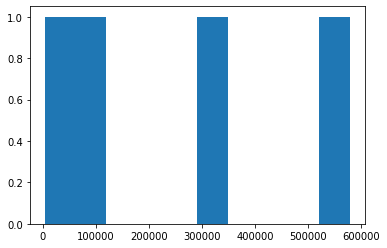

In [109]:
plt.hist([lose,even,win_1,win_2]) #need to add lines and labels to this


7. Is this really a fair game of 1/6 + 1/6 + 1/6 odds?


In [111]:
# No, there is ~58% chance to lose a dollar, ~35% chance of breaking even, 
# ~7% chance of winning a dollar, and ~0.5% chance of winning 2$, 
# with each game losing about $0.50 a play.
# I will say the odds of the house winning are closer to 
# that 1/6 + 1/6 + 1/6 'fair game' odds.


8. If you play 1,000,000 games in a row, what are your winnings/losses?

In [114]:
lose_tot + even_tot + win_1_tot + win_2_tot
print("You'll lose about $500,000 of the $1,000,000 used to play")

You'll lose about $500,000 of the $1,000,000 used to play
